<b><h2>Lets Grow More</h2></b>

<b><i><u>Name:- Jaya Yadav</u></i></b>

<b>Task 2: Stock Markket prediction and forecasting using Stacked LSTM</b>



<b>Dataset:-</b> https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

<b><h1>Importing Libraries</h><b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
import warnings

<b><h1>Data Exploration</h1><b>

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
# Check shape of data
df.shape

(2035, 8)

In [5]:
# getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
# Check if there is any null values present or not
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
# Check if there is any null values present or not
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

<b><h1>Exploratory Data Analysis</h1></b>

<h1>Data Visualization</h1>

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

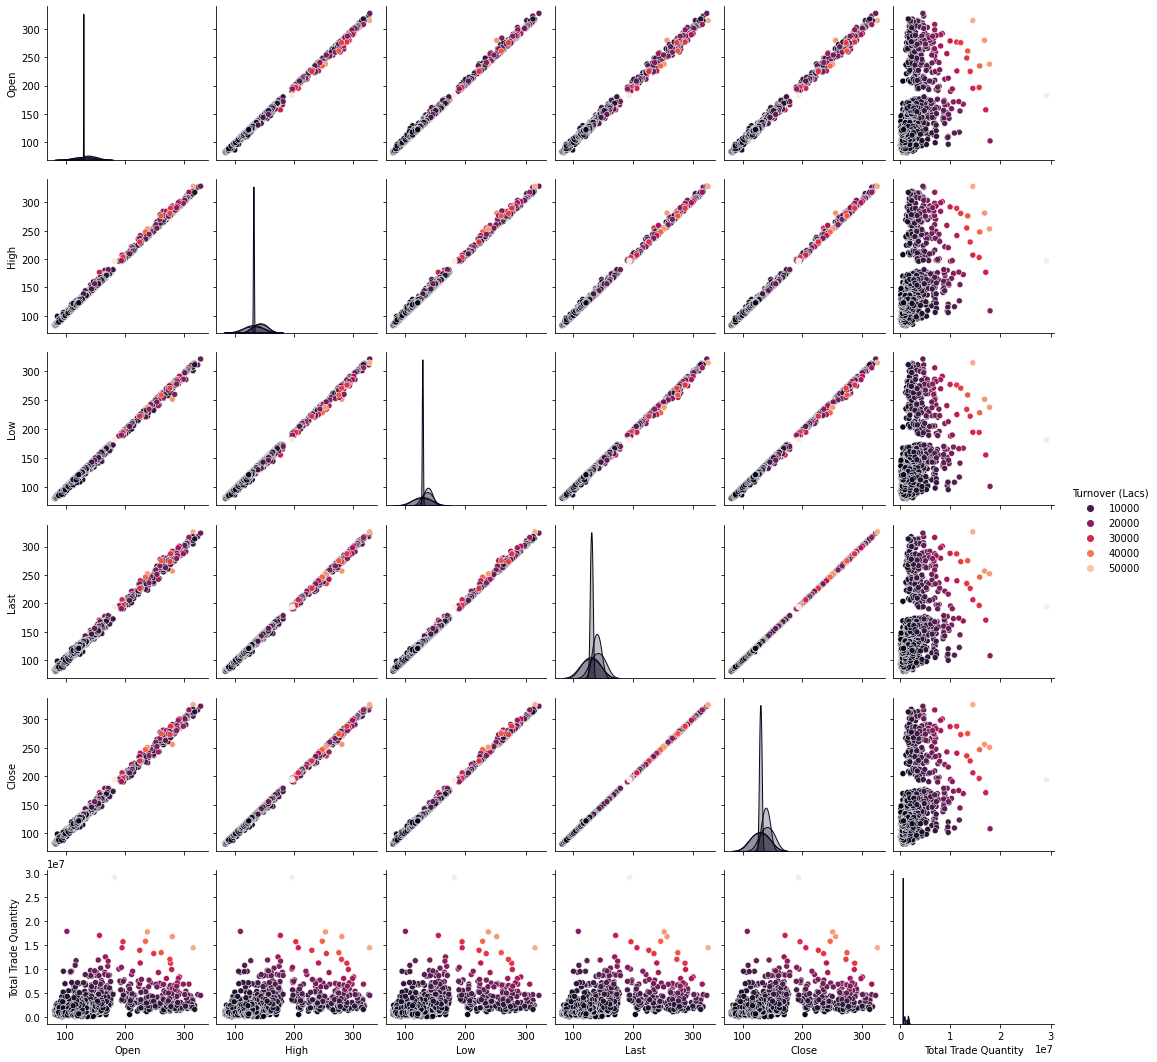

In [11]:
sns.pairplot(df, hue="Turnover (Lacs)", palette="rocket")
plt.show()

In [12]:
df_close = df.reset_index()['Close'] 
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

<ul><h4>Let us plot the close value graph using pyplot</h4></ul>

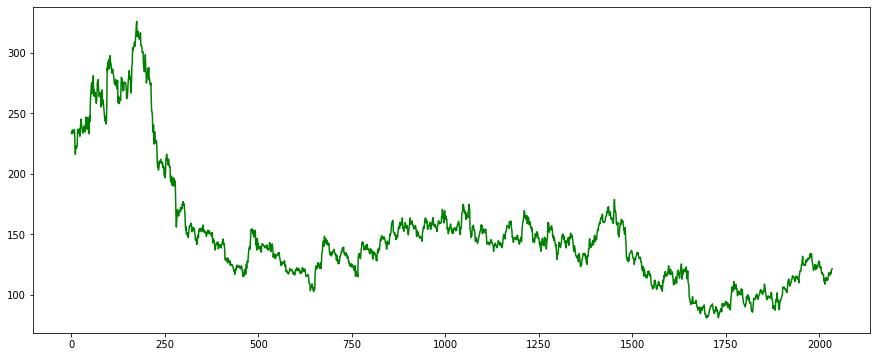

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(df_close, c="g")
plt.show()


<ul><h4>Let us plot the high value graph using pyplot</h4></ul>

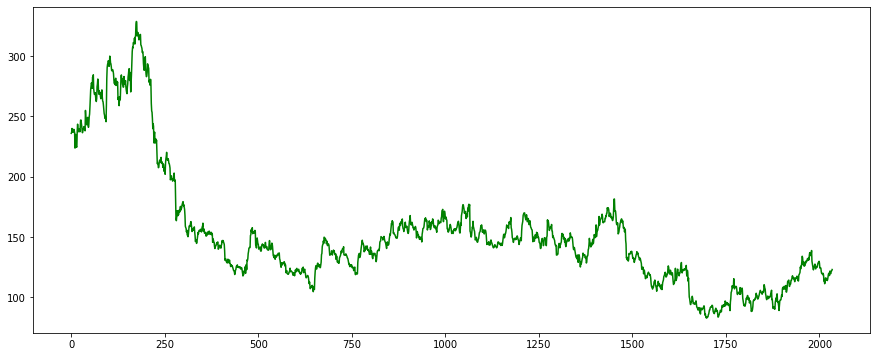

In [14]:
plt.figure(figsize=(15, 6))
df_high=df.reset_index()['High']
plt.plot(df_high, c='g')
plt.show()

<ul><h4>Since LSTM are sensitibe to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1</h4></ul>

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1, 1))

In [16]:
df_high.shape

(2035, 1)

In [17]:
df_high

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

<b><h1>Train Test Split</h1></b>

In [18]:
training_size = int(len(df_high) * 0.75 )
test_size=len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high), :1]

In [19]:
training_size, test_size

(1526, 509)

<b><h1>Data Preprocessing</h1></b>

In [20]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1 ) :
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataX)

In [21]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

<b><h1>LSTM</h1></b>

<ul><h4>Reshape the input to be [ samples, time steps, features] which is the requirement of LSTM</h4></ul>

In [22]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [23]:
print(x_train.shape) 
print(y_train.shape)

(1425, 100, 1)
(1425, 100)


In [24]:
print(x_test.shape)
print(y_test.shape)

(408, 100, 1)
(408, 100)


<ul><h4>Import required modules for the stacked LSTM</h4></ul>

In [25]:
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

<ul><h4>Create LSTM Module</h4></ul>

In [26]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 15s 262ms/step - loss: 0.0379 - val_loss: 0.0108
Epoch 2/100
23/23 [==============================] - 5s 228ms/step - loss: 0.0093 - val_loss: 0.0052
Epoch 3/100
23/23 [==============================] - 6s 248ms/step - loss: 0.0074 - val_loss: 0.0040
Epoch 4/100
23/23 [==============================] - 5s 222ms/step - loss: 0.0068 - val_loss: 0.0031
Epoch 5/100
23/23 [==============================] - 7s 292ms/step - loss: 0.0065 - val_loss: 0.0029
Epoch 6/100
23/23 [==============================] - 6s 254ms/step - loss: 0.0061 - val_loss: 0.0024
Epoch 7/100
23/23 [==============================] - 7s 288ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 8/100
23/23 [==============================] - 6s 270ms/step - loss: 0.0044 - val_loss: 0.0019
Epoch 9/100
23/23 [==============================] - 6s 258ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 10/100
23/23 [==============================] - 5s 207ms/step - loss: 0.0039 - val_l

In [29]:
# Let predict and check performance matrirx
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [30]:
# Transform back to original form 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


<b><h1>Plotting graph according to train and test data</h1></b>

<ul><h4>Plotting</h4></ul>

In [31]:
# Shift train prediction for plotting 
look_back=100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, : ] = train_predict


In [32]:
# Shifting test prediction for plotting
testPredictplot = np.empty_like(df_high)
testPredictplot[:,:] = np.nan
testPredictplot[len(train_predict) + (look_back * 2) + 1 : len(df_high) - 1, :  ] = test_predict

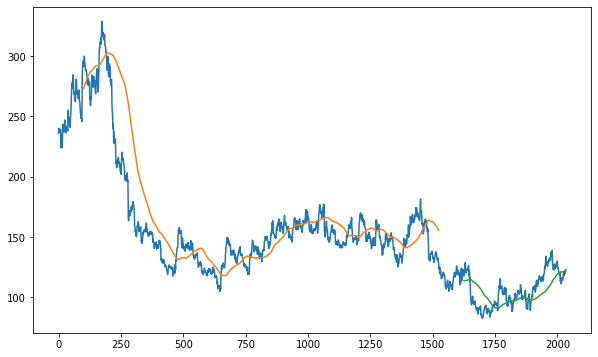

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [33]:
# Plot baseline and predictions
plt.figure(figsize=(10, 6))

plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictplot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [34]:
# predict the next 28 days stock price 
len(test_data)
x_test.shape

(408, 100, 1)

In [35]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

<b><h1>Predicting values for next 30 days</h1></b>

In [36]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15888058]
101
1 day input [0.13254727 0.13397032 0.13356373 0.13498679 0.14108559 0.13498679
 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049
 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904
 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228
 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599
 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665
 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754
 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372
 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426 0.16853019
 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839
 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654
 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037
 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811
 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385
 0.12807481 0.12624517 0.13051433

In [37]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 129)

In [38]:
day_new.shape

(100,)

In [39]:
ds3 = df_high.tolist()
ds3.extend(lst_output)

len(df_high)

2035

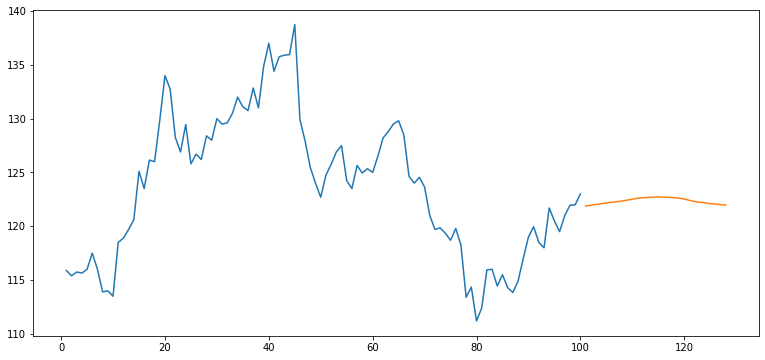

In [40]:
plt.figure(figsize=(13, 6))

plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.show()

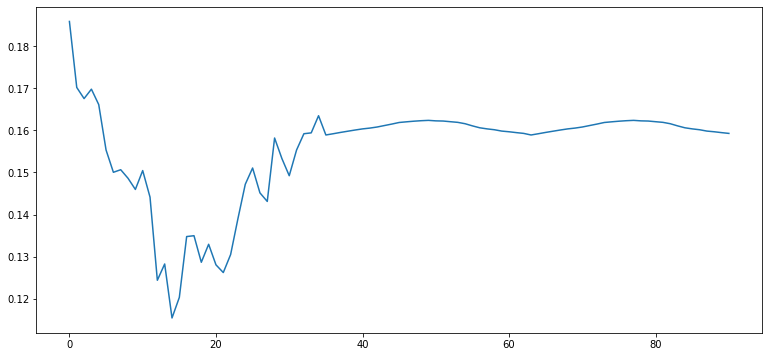

In [41]:
plt.figure(figsize=(13, 6))

de3 = df_high.tolist()
ds3.extend(lst_output)
plt.plot(ds3[2000:])

plt.show()

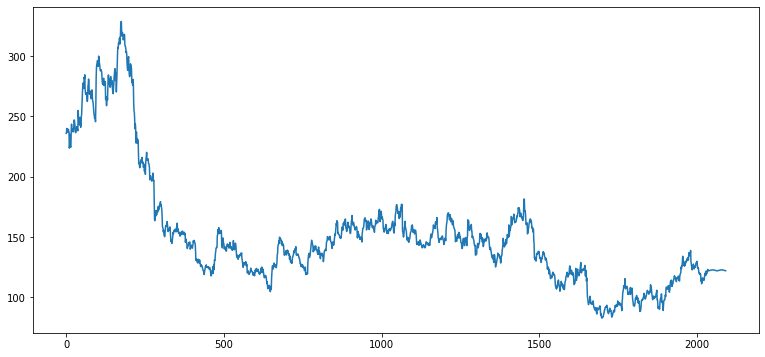

In [42]:
plt.figure(figsize=(13,6))

ds3=scaler.inverse_transform(ds3).tolist()
plt.plot(ds3)

plt.show()